<a href="https://colab.research.google.com/github/Prakum14/Testfiles/blob/master/M2_AST_02_CNN_Transfer_Learning_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 2: Leveraging a pre-trained model

## Learning Objectives:

At the end of the experiment, you will be able to:

1. Understand and use a pre-trained model
2. Fine-tune the top layers while using a pre-trained model


## Introduction

A common and highly effective approach to deep learning on small image datasets is to use a pre-trained model.

If the original dataset is large enough and general enough, the spatial hierarchy of features learned by the pre-trained model can effectively act as a generic model of the visual world, and hence, its features can prove useful for many different computer vision problems even though these new problems may involve completely different classes than those of the original task.

There are two ways to use a pre-trained model:
  * feature extraction and
  * fine-tuning

### Feature extraction

A CNN typically consists of a:
* Convolutional base
* Densely connected classifier

Key Idea -
* Features are learned by the convolutional base. So reuse it.
* Train a new classifier for your problem

![picture](https://drive.google.com/uc?export=view&id=12FzJVGUCzQGDArYSqdABntKwKGHzIjVX)

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2416218" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "8975485400" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M2_AST_02_CNN_Transfer_Learning_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    # ipython.magic("wget https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Acoustic_Extinguisher_Fire_Dataset.xlsx")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import libraries

In [4]:
# Imports specific layers for building neural networks in Keras.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# Imports the Input class, used to define the input shape for the model.
from tensorflow.keras import Input

# Imports the Model class, which is used to create a Keras model.
from tensorflow.keras import Model

# Imports the load_model function, which is used to load a saved model from disk.
from tensorflow.keras.models import load_model

# Imports NumPy, a library for numerical and matrix operations, commonly used for handling and manipulating data arrays.
import numpy as np

# Imports Pandas, a data manipulation library, especially useful for handling data in DataFrames.
import pandas as pd

# Imports Matplotlib's Pyplot module, which is used for creating visualizations and plots.
import matplotlib.pyplot as plt

Let us reuse the VGG16 network which has been trained on the ImageNet, which contains multiple classes of cats and dogs among other things.

We expect the convolution base to have learned features that help it identify cats and dogs.

Keras provides us with a pre-trained VGG16 network!



In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

In [6]:
# Load the convolutional base of the pre-trained VGG16 model.
conv_base = VGG16(
    weights="imagenet",          # Use pre-trained weights from the ImageNet dataset.
    include_top=False,           # Exclude the fully connected (dense) layers on top used for classification.
    input_shape=(180, 180, 3)    # Define the input shape as 180x180 pixels with 3 color channels (RGB).
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
# See a summary of the convolutional base
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

So how do we extract the features? Simple:

Pass the images through the convolutional base.

In [8]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/cats_vs_dogs_small.zip
!unzip -qq '/content/cats_vs_dogs_small.zip'

In [9]:
# Define the base directory for the dataset.
data_dir = '/content/cats_vs_dogs_small'

# Define the path to the training data within the dataset directory.
train_path = data_dir + '/train'

# Define the path to the validation data within the dataset directory.
validation_path = data_dir + '/validation'

# Define the path to the test data within the dataset directory.
test_path = data_dir + '/test'

### Converting the image dataset into a workable format

In [10]:
# Import the function to load images from a directory and create a dataset.
from tensorflow.keras.utils import image_dataset_from_directory

# Load the training dataset from the specified directory.
train_dataset = image_dataset_from_directory(
    train_path,                   # Path to the training data directory.
    image_size=(180, 180),        # Resize images to 180x180 pixels.
    batch_size=32                 # Define the number of images to include in each batch.
)

# Load the validation dataset from the specified directory.
validation_dataset = image_dataset_from_directory(
    validation_path,              # Path to the validation data directory.
    image_size=(180, 180),        # Resize images to 180x180 pixels.
    batch_size=32                 # Define the batch size for validation.
)

# Load the test dataset from the specified directory.
test_dataset = image_dataset_from_directory(
    test_path,                    # Path to the test data directory.
    image_size=(180, 180),        # Resize images to 180x180 pixels.
    batch_size=32                 # Define the batch size for testing.
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Passing the dataset through Conv Base i.e forward pass through pre-trained weights

Before forward pass, Preprocessing the dataset specific to VGG16 is also required.

In [11]:
from tensorflow.keras.applications.vgg16 import preprocess_input       # Importing function for preprocessing specific to the vgg16

In [12]:
from tqdm import tqdm  # Import tqdm to display a progress bar for iterations. 'tqdm' means "progress" in Arabic.

# Define a function to extract features and labels from a dataset using a pretrained model.
def get_features_and_labels(dataset):
    all_features = []  # Initialize an empty list to store features.
    all_labels = []    # Initialize an empty list to store labels.

    # Loop through each batch of images and labels in the dataset, showing progress with tqdm.
    for images, labels in tqdm(dataset):
        preprocessed_images = preprocess_input(images)   # Preprocess images to fit the VGG16 input requirements.
        features = conv_base.predict(preprocessed_images, verbose=0)  # Forward pass to get features from VGG16.

        # Append the extracted features and labels to their respective lists.
        all_features.append(features)
        all_labels.append(labels)

    # Concatenate all features and labels into single NumPy arrays and return them.
    return np.concatenate(all_features), np.concatenate(all_labels)

# Extract features and labels for each dataset using the get_features_and_labels function.
train_feature, train_labels = get_features_and_labels(train_dataset)
val_feature, val_labels = get_features_and_labels(validation_dataset)
test_feature, test_labels = get_features_and_labels(test_dataset)

100%|██████████| 63/63 [00:11<00:00,  5.54it/s]


### Defining and training the densely connected classifier



In [13]:
# Define a classifier model using Keras' Functional API.
inputs = Input(shape=(5,5,512))  # Input layer with a shape of (5, 5, 512), representing extracted features.

# Flatten the input to transform the 5x5x512 feature map into a 1D vector.
x = Flatten()(inputs)

# Add a fully connected (dense) layer with 256 units.
x = Dense(256)(x)

# Add a dropout layer to reduce overfitting by randomly setting 50% of inputs to zero during training.
x = Dropout(0.5)(x)

# Output layer with a single unit and a sigmoid activation function for binary classification.
outputs = Dense(1, activation="sigmoid")(x)

# Define the model by specifying the input and output layers.
model_without_conv_base = Model(inputs, outputs)

# Compile the model with binary crossentropy loss for binary classification, rmsprop optimizer, and accuracy as the evaluation metric.
model_without_conv_base.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

#### Call Back Function

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint  # Import to save the model during training based on specific conditions.
from tensorflow.keras.callbacks import TensorBoard     # Import to enable logging for visualization in TensorBoard.
from tensorflow.keras.callbacks import EarlyStopping   # Import to stop training early if no improvement is detected.

In [15]:
# Define a function to return a list of commonly used callbacks.
def def_callbacks(filepath, mod_chk_mon="val_loss", tensorboard=True, earlystop=0):
    callback_list = []  # Initialize an empty list to store callbacks.

    # Default ModelCheckpoint callback to save the best model based on a monitored metric.
    callback_list.append(ModelCheckpoint(
        filepath + ".keras",                # File path to save the model.
        save_best_only=True,     # Save only the best model (based on monitored metric).
        monitor=mod_chk_mon      # Metric to monitor (e.g., "val_loss" for validation loss).
    ))

    # Optionally add a TensorBoard callback if tensorboard logging is enabled.
    if tensorboard:
        log_dir = "tensorLog_" + filepath  # Define log directory for TensorBoard.
        callback_list.append(TensorBoard(log_dir=log_dir))

    # Optionally add an EarlyStopping callback if a patience parameter is provided.
    if earlystop > 0:
        callback_list.append(EarlyStopping(patience=earlystop))

    return callback_list  # Return the list of callbacks.

In [16]:
# Fit (train) the densely connected classifier model.
history_wcb = model_without_conv_base.fit(
    train_feature, train_labels,             # Training data and labels.
    epochs=10,                               # Train for 20 epochs.
    validation_data=(val_feature, val_labels),  # Validation data and labels to monitor performance during training.
    callbacks=def_callbacks("feature_extraction_keras")  # Callbacks to monitor and save model performance.
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8524 - loss: 23.7989 - val_accuracy: 0.9750 - val_loss: 3.3293
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9785 - loss: 3.1576 - val_accuracy: 0.9760 - val_loss: 2.4523
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 1.6491 - val_accuracy: 0.9700 - val_loss: 5.2765
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 2.6970 - val_accuracy: 0.9730 - val_loss: 4.5338
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9941 - loss: 0.5732 - val_accuracy: 0.9770 - val_loss: 4.0643
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9960 - loss: 0.7288 - val_accuracy: 0.9770 - val_loss: 3.3963
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.3248 - val_accuracy: 0.9770 - val_loss: 3.6309
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9973 - loss: 0.4092 - val_accuracy: 0.9720 - val_los

Plotting Accuracy and Loss vs Epochs

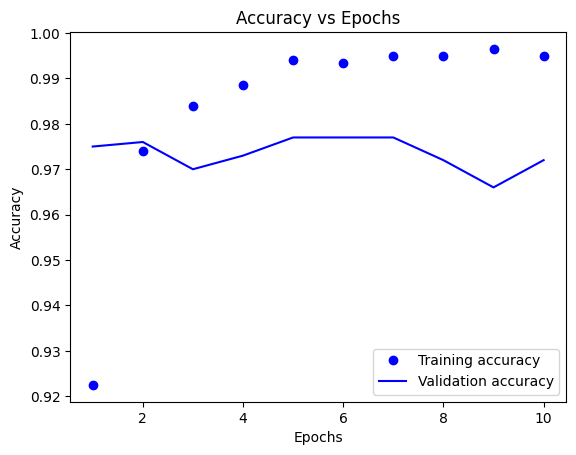

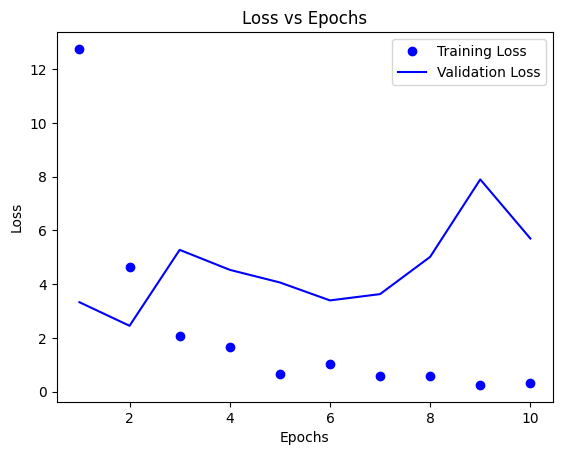

In [17]:
import pandas as pd  # Import pandas for data handling.
data = pd.DataFrame(history_wcb.history)  # Convert the training history to a DataFrame.
epochs = range(1, len(data) + 1)  # Create a range for the number of epochs.

# Plot training and validation accuracy vs. epochs.
plt.plot(epochs, data['accuracy'], 'bo', label="Training accuracy")  # Plot training accuracy with blue dots.
plt.plot(epochs, data['val_accuracy'], 'b', label="Validation accuracy")  # Plot validation accuracy with a blue line.
plt.legend()  # Display legend to distinguish between training and validation accuracy.
plt.xlabel("Epochs")  # Label the x-axis as "Epochs".
plt.ylabel("Accuracy")  # Label the y-axis as "Accuracy".
plt.title("Accuracy vs Epochs")  # Set the plot title.

# Plot training and validation loss vs. epochs.
plt.figure()  # Start a new figure for the loss plot.
plt.plot(epochs, data['loss'], 'bo', label="Training Loss")  # Plot training loss with blue dots.
plt.plot(epochs, data['val_loss'], 'b', label="Validation Loss")  # Plot validation loss with a blue line.
plt.legend()  # Display legend to distinguish between training and validation loss.
plt.xlabel("Epochs")  # Label the x-axis as "Epochs".
plt.ylabel("Loss")  # Label the y-axis as "Loss".
plt.title("Loss vs Epochs")  # Set the plot title.

plt.show()  # Display both plots.

In [18]:
# Load the pre-trained Keras model saved with the name "feature_extraction_keras"
test_model = load_model("feature_extraction_keras.keras")

# Evaluate the model on the test dataset (test_feature) and corresponding labels (test_labels)
# This function returns the loss value and the accuracy (or other metrics) of the model on the test data
test_loss, test_acc = test_model.evaluate(test_feature, test_labels)

# Print the test accuracy, formatted to 3 decimal places
print(f"Test accuracy:{test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9752 - loss: 4.8452
Test accuracy:0.974


The pretrained conv base + newly trained classification head has achieved roughly **97%** accuracy!

Remember, for convnet_from_scratch_with_data_augmentation, it was ~ 85%

For convnet_from_scratch, it was ~ 70%

## Fine tuning

The key idea here is to fine tune some top layers of the conv base as well.

We do so by freezing most of the bottom layers, leaving only a few top layers to train. Lets see:

In [19]:
# Load the convolutional base of the VGG16 model pre-trained on ImageNet
# 'weights="imagenet"' loads the weights trained on the ImageNet dataset
# 'include_top=False' excludes the fully connected top layers (classifier), only keeping the convolutional base
# 'input_shape=(180,180,3)' specifies the input size for the model (180x180 images with 3 color channels)
conv_base = VGG16(
    weights="imagenet",        # Use ImageNet pre-trained weights
    include_top=False,         # Exclude the top layers (classification layers) from the model
    input_shape=(180, 180, 3)  # Define the input shape as 180x180 RGB images
)

In [20]:
# Define the model's input layer with the shape of (180, 180, 3) representing 180x180 RGB images
inputs = Input(shape=(180, 180, 3))

# Optionally, apply data augmentation to the input images (currently commented out)
# x = data_augmentation(inputs)

# Preprocess the input images for the VGG16 model (this typically includes scaling pixel values)
x = preprocess_input(inputs)

# Pass the input through the convolutional base (VGG16) to extract features
x = conv_base(x)

# Flatten the output from the convolutional base (convert 2D feature maps to 1D)
x = Flatten()(x)

# Add a fully connected (dense) layer with 256 units
x = Dense(256)(x)

# Add dropout to the dense layer with a rate of 50% to reduce overfitting
x = Dropout(0.5)(x)

# Add the output layer with a single unit and sigmoid activation for binary classification
outputs = Dense(1, activation="sigmoid")(x)

# Define the model with the input and output layers
model = Model(inputs, outputs)

In [21]:
from tensorflow.keras.optimizers import RMSprop

In [22]:
conv_base.layers

[<InputLayer name=input_layer_2, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [23]:
# Freeze all layers in the convolutional base up until the fourth layer from the last
# This will allow the last few layers to be fine-tuned during training while keeping the others fixed
conv_base.trainable = True  # Set all layers in the convolutional base as trainable initially
for layer in conv_base.layers[:-4]:   # Loop through all layers except the last 4
    layer.trainable = False  # Set each of these layers as non-trainable (they won't be updated during training)

# Model compilation
# Set the loss function for binary classification (binary crossentropy)
# Use RMSprop optimizer with a very small learning rate (1e-5) to fine-tune the model without drastically changing the weights
model.compile(
    loss="binary_crossentropy",                    # Loss function for binary classification
    optimizer=RMSprop(learning_rate=1e-5),         # Use a small learning rate to avoid drastic changes in pre-trained weights
    metrics=["accuracy"]                           # Track accuracy during training
)

# Display a summary of the model architecture (layers, number of parameters, etc.)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 180, 180, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 180, 180)       │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 180, 180)       │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 180, 180)       │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 180, 180, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 180, 180, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 5, 5, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 12800)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 256)            │      3,277,056 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 256)            │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            257 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 10,356,737 (39.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [24]:
# Define a callback function to save the best model during training
# 'ModelCheckpoint' saves the model to the specified filepath only if the validation loss improves
callbacks = [ModelCheckpoint(filepath="fine_tuning_keras.keras",  # Path where the best model will be saved
                              save_best_only=True,           # Only save the model if the validation loss improves
                              monitor="val_loss")]           # Monitor the validation loss to determine improvement


In [25]:
## Training
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.6654 - loss: 7.6107 - val_accuracy: 0.9190 - val_loss: 0.6770
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.9040 - loss: 0.9744 - val_accuracy: 0.9370 - val_loss: 0.5206
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.9370 - loss: 0.5259 - val_accuracy: 0.9480 - val_loss: 0.4519
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.9692 - loss: 0.1945 - val_accuracy: 0.9560 - val_loss: 0.4086
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.9880 - loss: 0.0625 - val_accuracy: 0.9540 - val_loss: 0.4574
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.9870 - loss: 0.0986 - val_accuracy: 0.9600 - val_loss: 0.4039
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9919 - loss: 0.0517 - val_accuracy: 0.9610 - val_loss: 0.3577
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9955 - loss: 0.0176 - val_accu

In [26]:
# Train the model using the fit() function
# 'train_dataset' is the training data, 'validation_dataset' is the validation data
# Training will run for 30 epochs, and the ModelCheckpoint callback will be used to save the best model
history = model.fit(
    train_dataset,                      # Training data (inputs and labels)
    epochs=30,                           # Number of epochs to train the model
    validation_data=validation_dataset,  # Validation data to monitor during training (used for validation loss and metrics)
    callbacks=callbacks                  # List of callback functions (e.g., ModelCheckpoint to save the best model)
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.9972 - loss: 0.0257 - val_accuracy: 0.9660 - val_loss: 0.4422
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step - accuracy: 1.0000 - loss: 6.1373e-05 - val_accuracy: 0.9640 - val_loss: 0.4789
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9640 - val_loss: 0.4613
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 1.0000 - loss: 6.6698e-04 - val_accuracy: 0.9660 - val_loss: 0.4162
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 1.0000 - loss: 4.2421e-06 - val_accuracy: 0.9670 - val_loss: 0.4185
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 1.0000 - loss: 4.8481e-07 - val_accuracy: 0.9670 - val_loss: 0.4193
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.9999 - loss: 6.3315e-05 - val_accuracy: 0.9670 - val_loss: 0.4445
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - accuracy: 1.0000 - los

# Using already run and saved models

For this save the model checkpoints in your drive (download the checkpoints and save to drive) give that path while loading.

Mount your G drive:

In [42]:
# Mount Google Drive to access files stored in it
from google.colab import drive
drive.mount('/content/drive')  # This will prompt for authentication and mount your Google Drive at /content/drive

# Change the current working directory to a specific folder in Google Drive
%cd "/content/drive/My Drive"  # Change directory to the "My Drive" folder or any other folder in your Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive # Change directory to the My Drive folder or any other folder in your Google Drive'
/content


For example, you downloaded the `feature_extraction_keras` model and saved it in your drive inside a folder named 'model'. You can load it here like this:

    model_saved_1 = load_model('/content/drive/MyDrive/model/feature_extraction_keras')

 In this case the file path is simply : '/content/feature_extraction_keras'

In [31]:
# Load the pre-trained model from the specified file path
model_fewa = load_model('/content/feature_extraction_keras.keras')  # Load the model saved at '/content/feature_extraction_keras'

In [32]:
# Evaluate the loaded model on the test dataset (test_feature and test_labels)
# This returns two values: the loss and accuracy of the model on the test data
test_loss, test_acc = model_fewa.evaluate(test_feature, test_labels)

# Print the test accuracy, formatted to 3 decimal places
print(f"Test accuracy is:{test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9752 - loss: 4.8452
Test accuracy is:0.974


Great! feature_extraction model has achieved **97%** accuracy!

### Please answer the questions below to complete the experiment:




In [34]:
#@title  What is the main idea of transfer learning in deep learning? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "B) To use the pre-trained Convolutional Base (Conv_Base) as a feature extractor and add new layers to the top of the pre-trained model for fine-tuning on a new dataset or task." #@param ["", "A) To train the pre-trained Convolutional Base (Conv_Base) from scratch on a new dataset or task.", "B) To use the pre-trained Convolutional Base (Conv_Base) as a feature extractor and add new layers to the top of the pre-trained model for fine-tuning on a new dataset or task.", "C) To use the pre-trained Convolutional Base (Conv_Base) as the only layers for the new dataset or task without any modifications."]

In [33]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [35]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Nothing" #@param {type:"string"}

In [37]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [36]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [38]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [39]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2001
Date of submission:  17 Nov 2024
Time of submission:  21:28:32
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
